# Introduction
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* **If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company**

* **If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company**

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

* **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

* **All other cases:** All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

* **Approved:** The Company has approved loan Application

* **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

* **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

* **Unused offer:**  Loan has been cancelled by the client but on different stages of the process.
 

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as **denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.** This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

**In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.**

**To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).**

### Importing all the respective Libraries

In [2]:
# import all the respective libraries 

import numpy as np                  #helps to do mathematical functions
import pandas as pd                 #help to do multi-dimentional function in tabular form 
import matplotlib.pyplot as plt     #helps to control the plot area and chart plotting
import seaborn as sns               #helps to use only to plot a chart with much better way 
%matplotlib inline                  #helps to enable the inline plotting in Jupyter Nootbook

UsageError: unrecognized arguments: #helps to enable the inline plotting in Jupyter Nootbook


In [3]:
# To control warnings

import warnings   
warnings.filterwarnings("ignore")  

### Importing the 1st Data - application_data

In [4]:
application_data = pd.read_csv("application_data.csv")
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Check the shape , Info and Description of Application Data

In [5]:
# checking the shape of Application Data
application_data.shape

(307511, 122)

In [6]:
# checking the info of Applicatuon Data
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 267.5+ MB


In [7]:
# checking the discreption of Application Data
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',250)
 
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
# checking the percentage of missing values for all the columns

round(100*application_data.isnull().sum()/len(application_data),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

There are so many missing values in multiple columns so to see them we have to calculate the total number of missing values column

In [10]:
# checking only null values are present in each of the columns and defining a fuction key for null values 
# which we could later on use to drop those columns

def null_values(application_data):
    return round((application_data.isnull().sum()*100/len(application_data)),2)

In [11]:
null_values(application_data)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### Keeping 60% has a threshold value so before droppoing or imputing them we have to check those column, its might be  usefull in further analysis.

In [12]:
null_values_greater_60 = null_values(application_data)[null_values(application_data)>60]
print("No. of Null Values which are greater than 60% : " , len(null_values_greater_60))
print(null_values_greater_60)

No. of Null Values which are greater than 60% :  17
OWN_CAR_AGE                 65.99
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
FLOORSMIN_AVG               67.85
LIVINGAPARTMENTS_AVG        68.35
NONLIVINGAPARTMENTS_AVG     69.43
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
FLOORSMIN_MODE              67.85
LIVINGAPARTMENTS_MODE       68.35
NONLIVINGAPARTMENTS_MODE    69.43
YEARS_BUILD_MEDI            66.50
COMMONAREA_MEDI             69.87
FLOORSMIN_MEDI              67.85
LIVINGAPARTMENTS_MEDI       68.35
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
dtype: float64


In [13]:
application_data.drop(columns=null_values_greater_60.index, inplace =True) 

In [14]:
application_data.shape

(307511, 105)

We can drop these columns as these looks like not so relevent for Analysis. However, these are only 17 columns and if we can go back to previous step and check on above 40% then also we can drop some more irrelevent columns from our data.

In [15]:
null_values_greater_40 = null_values(application_data)[null_values(application_data)>40]
print("No. of Null Values which are greater than 40% : " , len(null_values_greater_40))
print(null_values_greater_40)

No. of Null Values which are greater than 40% :  32
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
LANDAREA_AVG                    59.38
LIVINGAREA_AVG                  50.19
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
LANDAREA_MODE                   59.38
LIVINGAREA_MODE                 50.19
NONLIVINGAREA_MODE              55.18
APARTMENTS_MEDI                 50.75
BASEMENTAREA_MEDI               58.52
YEARS_BEGINEXPLUATATION_MEDI    48.78
ELEVATORS_MEDI                  53.30
ENTRANCES_MEDI                  50.35
FLOORSMAX_MEDI                  49.7

In [16]:
application_data.drop(columns=null_values_greater_40.index, inplace =True) 

In [17]:
application_data.shape    # this shows the drop in column which is now 73 instead of 122

(307511, 73)

We can check column which are greater than 13% , in case they are also irrelevent or not ?

In [18]:
null_values_greater_13 = null_values(application_data)[null_values(application_data)>13]
null_values_greater_13

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

#### All above columns looks like useful for Analysis so we will not drop them.

### Imputing the missing values

In [19]:
# checking again the missing values and due to large data we can pick only top highest 15 columns

null_values(application_data).sort_values(ascending = False).head(15)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

In [20]:
#Inspect the nulls in the OCCUPATION_TYPE column

application_data[application_data['OCCUPATION_TYPE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.685011,0.524496,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-16010,-1185,-5034.0,-4392,1,1,0,1,1,0,NaN,3.0,1,1,SATURDAY,17,0,0,0,0,0,0,Business Entity Type 2,0.661025,0.199771,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,-23125,365243,-5485.0,-4115,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,XNA,0.307082,0

#### Observation
* **This is a MNAR situation - Missing Not At Random , Unknown occupation is showing relation with "Name_Contract_Type"- which means *Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application*, Hence applicant felt not feeling like to fill occupation column while taking cash loan - example instant loan, personal loan etc. which bank provides very quick and faster with minimal documentation.**


In [21]:
# imputing null values with "Unknown"

application_data["OCCUPATION_TYPE"] = application_data["OCCUPATION_TYPE"].fillna("Unknown") 

In [22]:
# check null values in column OCCUPATION_TYPE

application_data["OCCUPATION_TYPE"].isnull().sum()  

0

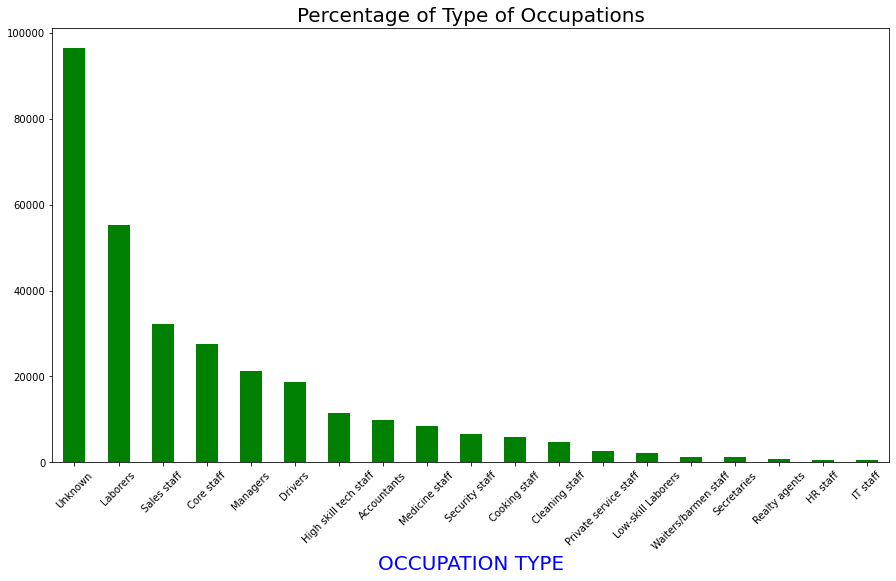

In [23]:
# Plotting a bar graph of OCCUPATION_TYPE

plt.figure(figsize = [15,8])
(application_data["OCCUPATION_TYPE"].value_counts()).plot.bar(color= 'Green')

plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20 , "fontweight" :15})
plt.xlabel("OCCUPATION TYPE",fontdict={"fontsize":20 , "fontweight" :10 , "color" : 'Blue'})

plt.xticks(rotation=45)
plt.show()

* Bar plot showing the highest value under Unknown named bar in Occupation Type

### Now taking another highest values for imputing the value

#### EXT_SOURCE_3

In [24]:
#Inspect the nulls in the EXT_SOURCE_3 column

application_data[application_data['EXT_SOURCE_3'].isnull()].head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,-615.0,-2056,1,1,0,1,0,0,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.642656,NaN,0.0,0.0,0.0,0.0,-188.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17,100021,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,-9776,-191,-4143.0,-2427,1,1,0,1,0,0,Laborers,3.0,2,2,MONDAY,10,0,0,0,1,1,0,Construction,0.683513,NaN,4.0,0.0,4.0,0.0,-2811.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-18252,-4286,-298.0,-1800,1,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Self-employed,0.113375,NaN,0.0,0.0,0.0,0.0,-296.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
29,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1,1,0,1,0,0,Laborers,1.0

In [25]:
application_data.EXT_SOURCE_3.isnull().count()

307511

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


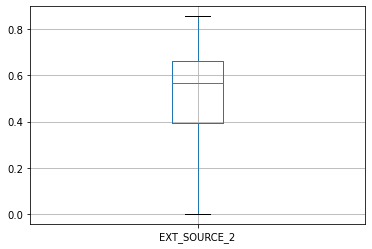

In [26]:
# Plot box plot to check outliers and decision to pick mean or median to impute the missing values.

print(application_data.EXT_SOURCE_3.describe())
application_data.boxplot(column=['EXT_SOURCE_2'])
plt.show()


In [27]:
# imputing null values with "median"

application_data["EXT_SOURCE_3"] = application_data["EXT_SOURCE_3"].fillna(application_data['EXT_SOURCE_3'].median()) 

In [28]:
# check null values in column EXT_SOURCE_2

application_data["EXT_SOURCE_3"].isnull().sum()  

0

### Columns that have greater than 13% missing values 

In [29]:
null_values_greater_13 = null_values(application_data)[null_values(application_data)>13]
null_values_greater_13

AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
dtype: float64

* **As we saw till now for imputing missing values less than 13%, we should not use mean as it is in decimal form, hence for imputing purpose we will use median for all these columns**


In [30]:
# Imputing all the balance greater than 13 % with median value

AMT_REQ_CREDIT_All_COLOUMNS = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [31]:
#filling missing values with median values

application_data.fillna(application_data[AMT_REQ_CREDIT_All_COLOUMNS].median(),inplace = True)

In [32]:
# checking again the null values by taking highest 15 values

null_values(application_data).sort_values(ascending = False).head(15)

NAME_TYPE_SUITE             0.42
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
EXT_SOURCE_2                0.21
AMT_GOODS_PRICE             0.09
SK_ID_CURR                  0.00
FLAG_DOCUMENT_4             0.00
FLAG_DOCUMENT_8             0.00
FLAG_DOCUMENT_7             0.00
FLAG_DOCUMENT_6             0.00
FLAG_DOCUMENT_5             0.00
FLAG_DOCUMENT_2             0.00
FLAG_DOCUMENT_3             0.00
dtype: float64

In [33]:
# Droppoing all the NaN from the data as these are very small in numbers in each column and does not have any impact

application_data = application_data.dropna(axis=1)

In [34]:
# checking again the null values by taking highest 15 values

null_values(application_data).sort_values(ascending = False).head(5)

SK_ID_CURR                 0.0
FLAG_DOCUMENT_12           0.0
LIVE_CITY_NOT_WORK_CITY    0.0
ORGANIZATION_TYPE          0.0
EXT_SOURCE_3               0.0
dtype: float64

* Now we impute / dropped all NaN values as per the requirement

### Sanity Check 

In [35]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.515695,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.174736,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.417100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.535276,0.000000,1.000000,0.000000,0.000000,0.

#### Observation

* **columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH which counts days have negative values. thus will correct those values**
* **convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED**


### Fixing one-by-one column

* **Converting negative DAYS_BIRTH, DAYS_EMPLOYED , DAYS_REGISTRATION , DAYS_ID_PUBLISH value to positive value**

In [36]:
# DAYS_BIRTH value
application_data['DAYS_BIRTH']=application_data['DAYS_BIRTH'].abs()

# DAYS_EMPLOYED 
application_data['DAYS_EMPLOYED']=application_data['DAYS_EMPLOYED'].abs()

# DAYS_REGISTRATION
application_data['DAYS_REGISTRATION']=application_data['DAYS_REGISTRATION'].abs()

# DAYS_ID_PUBLISH
application_data['DAYS_ID_PUBLISH']=application_data['DAYS_ID_PUBLISH'].abs()

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.139376,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,1,1,MONDAY,11,0,0,0,0,0,0,School,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.729567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.535276,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.535276,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


* **Convert DAYS_BIRTH to AGE_GROUP in years and DAYS_EMPLOYED to YEARS EMPLOYED**

In [37]:
# Days_Birth to Age_Group

application_data["AGE"] = application_data["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

application_data["AGE_GROUP"] = pd.cut(application_data["AGE"], bins=bins, labels=slots)

In [38]:
application_data["AGE_GROUP"].value_counts(normalize= True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [39]:
# DAYS_EMPLOYED to EMPLOYEMENT_YEARS

application_data["YEARS_EMPLOYED"] = application_data["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

application_data["EMPLOYEMENT_YEARS"] = pd.cut(application_data["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [40]:
application_data["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.061911
5-10        25.729074
10-15       10.926289
15-20        4.302854
20-25        2.476054
25-30        1.311996
30 Above     1.191822
Name: EMPLOYEMENT_YEARS, dtype: float64

In [41]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_3,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.515695,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,43.936973,185.547239
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.174736,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,11.956133,382.037676
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.417100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.008219,2.556164
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,12.000000,0.

* **Columns those have high difference between max and 75 percentile has outliers and we have to check to take action accordingly ; These are - CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH , HOUR_APPR_PROCESS_START, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT , AMT_REQ_CREDIT_BUREAU_YEAR , YEARS_EMPLOYED**

### Checking Outliers as per describe function

In [42]:
OUTLIER_CHECK = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
                     'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' , 
                     'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT' ,
                     'AMT_REQ_CREDIT_BUREAU_YEAR' , 'YEARS_EMPLOYED']

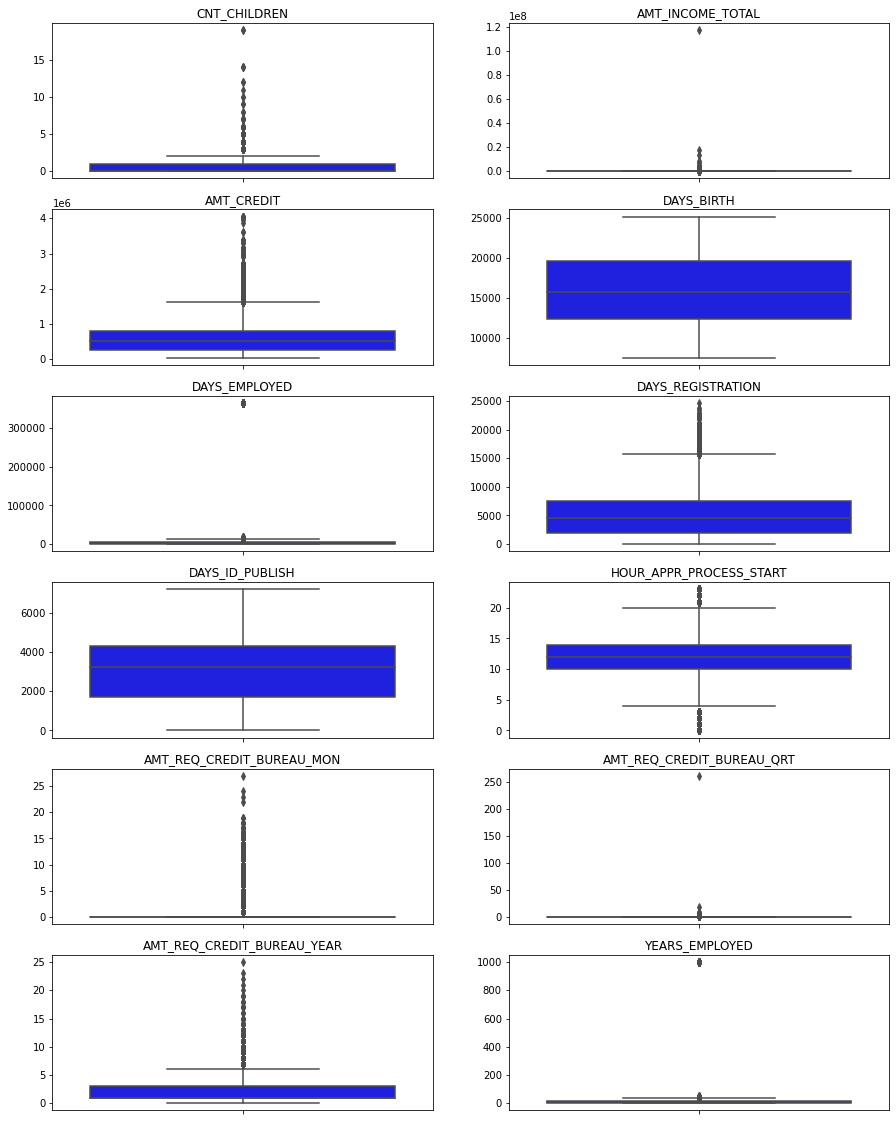

In [43]:
import itertools # using itertools for efficient looping plotting subplots

plt.figure(figsize=[15,20])
for i,j in itertools.zip_longest(OUTLIER_CHECK, range(len(OUTLIER_CHECK))):
    plt.subplot(6,2,j+1)
    sns.boxplot(y = application_data[i], orient = "h", color = "blue")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
plt.show()

### Observation

* **CNT_CHILDREN** - has outlier till 19 which looks like wrong entry  
* **AMT_INCOME_TOTAL** - has outlier till 12, which is exception 
* **AMT_CREDIT** - has many outliers 
* **DAYS_BIRTH** - has no outlier and this column is very reliable 
* **DAYS_EMPLOYED** - has outlier at 350000 which comes as 958 years, hence it is due to wrong entry
* **DAYS_REGISTRATION** - has many outliers  
* **DAYS_ID_PUBLISH** - has no outlier and this column is very reliable  
* **HOUR_APPR_PROCESS_START** - has both side outliers 
* **AMT_REQ_CREDIT_BUREAU_MON** - has many outliers 
* **AMT_REQ_CREDIT_BUREAU_QRT** - has extreme outliers 
* **AMT_REQ_CREDIT_BUREAU_YEAR** - has many outliers 
* **YEARS_EMPLOYED** - has exception outlier and ranging at 1000 years ehich is not possible

In [44]:
application_data.nunique().sort_values()

REG_CITY_NOT_WORK_CITY              2
FLAG_PHONE                          2
FLAG_EMAIL                          2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
FLAG_DOCUMENT_10                    2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_MOBIL                          2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_DOCUMEN

In [45]:
# checking the datatypes of all the columns and change the data type

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   NAME_INCOME_TYPE             307511 non-null  object  
 10  NAME_EDUCATION_TYPE          307511 non-null  object  
 11  NAME_FAMILY_STATUS           307511 non-null  object  
 12  NAME_HOUSING_TYPE            307511 non-null

In [46]:
# conversion of columns integer to categorical and considering columns with 3 unique values as categorical variables

for col in application_data.columns:
    if application_data[col].nunique() <= 3:
        application_data[col] = application_data[col].astype(object)

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  object  
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   NAME_INCOME_TYPE             307511 non-null  object  
 10  NAME_EDUCATION_TYPE          307511 non-null  object  
 11  NAME_FAMILY_STATUS           307511 non-null  object  
 12  NAME_HOUSING_TYPE            307511 non-null

### Importing the 2nd Data - previous_application

In [47]:
# import all the respective libraries 

import numpy as np                  #helps to do mathematical functions
import pandas as pd                 #help to do multi-dimentional function in tabular form 
import matplotlib.pyplot as plt     #helps to control the plot area and chart plotting
import seaborn as sns               #helps to use only to plot a chart with much better way 
%matplotlib inline                  #helps to enable the inline plotting in Jupyter Nootbook

# To control warnings

import warnings   
warnings.filterwarnings("ignore") 

UsageError: unrecognized arguments: #helps to enable the inline plotting in Jupyter Nootbook


In [48]:
previous_application = pd.read_csv('previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
previous_application.shape

(1048575, 37)

In [50]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,3721.000000,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,0.187177,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,0.083343,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,0.189122,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [51]:
# checking only null values are present in each of the columns in percentage and defining a fuction key for null values 
# which we could later on use to drop those columns

def null_values(previous_application):
    return round((previous_application.isnull().sum()*100/len(previous_application)),2)

In [52]:
# Sorting and checking for relevent columns with  null values

null_values(previous_application).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.65
RATE_INTEREST_PRIMARY          99.65
RATE_DOWN_PAYMENT              53.35
AMT_DOWN_PAYMENT               53.35
NAME_TYPE_SUITE                49.13
NFLAG_INSURED_ON_APPROVAL      40.12
DAYS_FIRST_DRAWING             40.12
DAYS_FIRST_DUE                 40.12
DAYS_LAST_DUE_1ST_VERSION      40.12
DAYS_LAST_DUE                  40.12
DAYS_TERMINATION               40.12
AMT_GOODS_PRICE                22.98
AMT_ANNUITY                    22.22
CNT_PAYMENT                    22.22
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [53]:
# checking null columns having missing values more than 50%

previous_app_greater_50 = null_values(previous_application)[null_values(previous_application)>50]
previous_app_greater_50

AMT_DOWN_PAYMENT            53.35
RATE_DOWN_PAYMENT           53.35
RATE_INTEREST_PRIMARY       99.65
RATE_INTEREST_PRIVILEGED    99.65
dtype: float64

### Observation

* **RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY** has null values 99.65% which of no use further so we can drop it.
* **AMT_DOWN_PAYMENT and RATE_DOWN_PAYMENT** - looks like not so relevent to do Analysis.

Hence, dropping them

In [54]:
previous_application.drop(columns = previous_app_greater_50.index, inplace = True)

In [55]:
# checking null columns having missing values more than 15%

previous_app_greater_15 = null_values(previous_application)[null_values(previous_application)>15]
previous_app_greater_15.sort_values(ascending = False)

NAME_TYPE_SUITE              49.13
DAYS_FIRST_DRAWING           40.12
DAYS_FIRST_DUE               40.12
DAYS_LAST_DUE_1ST_VERSION    40.12
DAYS_LAST_DUE                40.12
DAYS_TERMINATION             40.12
NFLAG_INSURED_ON_APPROVAL    40.12
AMT_GOODS_PRICE              22.98
AMT_ANNUITY                  22.22
CNT_PAYMENT                  22.22
dtype: float64

* **NAME_TYPE_SUITE**- has direct relevence with the data to get the information about the strength of client. Hence, we should have inmput the null values with "Unknown".

In [56]:
# Imputing values "Unknown" as this a categorical column

previous_application["NAME_TYPE_SUITE"] = previous_application["NAME_TYPE_SUITE"].fillna("Unknown")

previous_app_greater_15.sort_values(ascending = False)

NAME_TYPE_SUITE              49.13
DAYS_FIRST_DRAWING           40.12
DAYS_FIRST_DUE               40.12
DAYS_LAST_DUE_1ST_VERSION    40.12
DAYS_LAST_DUE                40.12
DAYS_TERMINATION             40.12
NFLAG_INSURED_ON_APPROVAL    40.12
AMT_GOODS_PRICE              22.98
AMT_ANNUITY                  22.22
CNT_PAYMENT                  22.22
dtype: float64

### Sanity Check

In [57]:
previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Unknown,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Unknown,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Unknown,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# converting negative values of DAYS_DECISION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION

previous_application['DAYS_DECISION'] = previous_application['DAYS_DECISION'].abs()

previous_application['SELLERPLACE_AREA'] = previous_application['SELLERPLACE_AREA'].abs()

previous_application['DAYS_FIRST_DUE'] = previous_application['DAYS_FIRST_DUE'].abs()

previous_application['DAYS_LAST_DUE_1ST_VERSION'] = previous_application['DAYS_LAST_DUE_1ST_VERSION'].abs()

previous_application['DAYS_LAST_DUE'] = previous_application['DAYS_LAST_DUE'].abs()

previous_application['DAYS_TERMINATION'] = previous_application['DAYS_TERMINATION'].abs()

previous_application['DAYS_FIRST_DRAWING'] = previous_application['DAYS_FIRST_DRAWING'].abs()

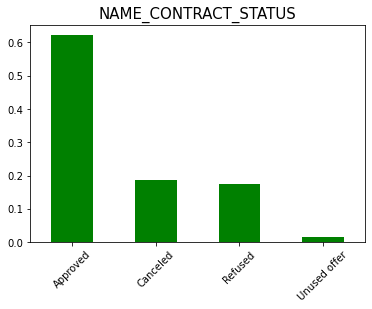

In [59]:
# checking the NAME_CONTRACT_STATUS column as this is important to take into consideration as per given data.

(previous_application.NAME_CONTRACT_STATUS.value_counts()/len(previous_application)).plot.bar(color='green')
plt.title("NAME_CONTRACT_STATUS", fontdict={"fontsize":15 , "fontweight" :15})
plt.xticks(rotation=45)
plt.show()

In [60]:
# converting DAYS_DECISION to years bins

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
previous_application['YEARLY_DECISION'] = pd.cut(previous_application['DAYS_DECISION'],bins,labels=slots)
previous_application['YEARLY_DECISION'].value_counts(normalize=True)*100

1          34.241328
2          23.092292
3          12.854874
4           7.908447
5           6.155687
7           5.801969
7 above     5.089574
6           4.855828
Name: YEARLY_DECISION, dtype: float64

In [61]:
previous_application.nunique()

SK_ID_PREV                     1048575
SK_ID_CURR                      305828
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     282291
AMT_APPLICATION                  75635
AMT_CREDIT                       74637
AMT_GOODS_PRICE                  75635
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2921
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      8
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2022
NAME_SELLER_INDUSTRY                11
CNT_PAYMENT                         48
NAME_YIELD_GROUP         

count    815566.000000
mean      15891.265151
std       14745.557438
min           0.000000
25%        6301.350000
50%       11250.000000
75%       20523.003750
max      418058.145000
Name: AMT_ANNUITY, dtype: float64


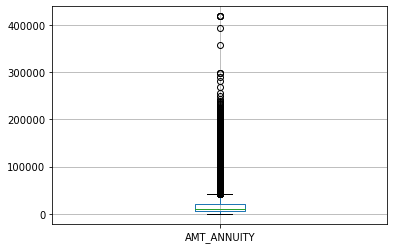

In [62]:
# Plot box plot to check outliers and decision to pick mean or median to impute the missing values.

print(previous_application.AMT_ANNUITY.describe())
previous_application.boxplot(column=['AMT_ANNUITY'])
plt.show()

#### Observation

* **showing so many outliers in box plot and hence imputing with mean would not be the right approach and hence imputing with median.**

In [63]:
# Imputing null values with median

previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].median(), inplace=True)

In [64]:
previous_application[previous_application['CNT_PAYMENT'].isnull()].head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
6,2315218,175704,Cash loans,NaN,0.0,0.0,111511.575,TUESDAY,11,Y,1,XNA,Canceled,14,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1
7,1656711,296299,Cash loans,NaN,0.0,0.0,111511.575,MONDAY,7,Y,1,XNA,Canceled,21,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1
8,2367563,342292,Cash loans,NaN,0.0,0.0,111511.575,MONDAY,15,Y,1,XNA,Canceled,386,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,2
9,2579447,334349,Cash loans,NaN,0.0,0.0,111511.575,SATURDAY,15,Y,1,XNA,Canceled,57,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1
22,1172842,302212,Cash loans,NaN,0.0,0.0,111511.575,TUESDAY,9,Y,1,XNA,Refused,239,XNA,HC,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1
24,1555330,199353,Cash loans,NaN,0.0,0.0,111511.575,SATURDAY,6,Y,1,XNA,Canceled,202,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1
29,1583704,315664,Cash loans,NaN,0.0,0.0,111511.575,WEDNESDAY,15,Y,1,XNA,Refused,430,XNA,HC,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,2
32,1471931,257846,Cash loans,NaN,0.0,0.0,111511.575,MONDAY,12,Y,1,XNA,Canceled,302,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1
33,1478703,393511,Cash loans,NaN,0.0,0.0,111511.575,WEDNESDAY,19,Y,1,XNA,Canceled,152,XNA,XAP,Unknown,Repeater,XNA,XNA,XNA,Credit and cash offices,1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1
41,1366380,247572,Consumer loans,NaN,17950.5,17950.5,17950.500,MONDAY,19,Y,1,XAP,Unused offer,1141,Cash through the bank,CLIENT,Unknown,Repeater,Mobile,XNA,XNA,Country-wide,25,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN,4


In [65]:
# taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.

previous_application.loc[previous_application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        191156
Refused          25655
Unused offer     16192
Approved             3
Name: NAME_CONTRACT_STATUS, dtype: int64

In [66]:
# Imputing CNT_PAYMENT null values as 0

previous_application['CNT_PAYMENT'].fillna(0,inplace = True)

In [67]:
null_values(previous_application).sort_values(ascending = False).head(10)

DAYS_FIRST_DRAWING           40.12
NFLAG_INSURED_ON_APPROVAL    40.12
DAYS_TERMINATION             40.12
DAYS_LAST_DUE                40.12
DAYS_LAST_DUE_1ST_VERSION    40.12
DAYS_FIRST_DUE               40.12
AMT_ANNUITY                  22.22
PRODUCT_COMBINATION           0.02
NAME_SELLER_INDUSTRY          0.00
NAME_PRODUCT_TYPE             0.00
dtype: float64

In [68]:
# checking the datatypes of all the columns and change the data type

previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1048575 non-null  int64   
 1   SK_ID_CURR                   1048575 non-null  int64   
 2   NAME_CONTRACT_TYPE           1048575 non-null  object  
 3   AMT_ANNUITY                  815566 non-null   float64 
 4   AMT_APPLICATION              1048575 non-null  float64 
 5   AMT_CREDIT                   1048575 non-null  float64 
 6   AMT_GOODS_PRICE              1048575 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object  
 8   HOUR_APPR_PROCESS_START      1048575 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1048575 non-null  object  
 12  NAME_CONTRACT_STATUS        

In [69]:
# conversion of columns integer to categorical and considering columns with 3 unique values as categorical variables

for col in previous_application.columns:
    if previous_application[col].nunique() <= 3:
        previous_application[col] = previous_application[col].astype(object)

previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1048575 non-null  int64   
 1   SK_ID_CURR                   1048575 non-null  int64   
 2   NAME_CONTRACT_TYPE           1048575 non-null  object  
 3   AMT_ANNUITY                  815566 non-null   float64 
 4   AMT_APPLICATION              1048575 non-null  float64 
 5   AMT_CREDIT                   1048575 non-null  float64 
 6   AMT_GOODS_PRICE              1048575 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object  
 8   HOUR_APPR_PROCESS_START      1048575 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  object  
 11  NAME_CASH_LOAN_PURPOSE       1048575 non-null  object  
 12  NAME_CONTRACT_STATUS        

### Outliers

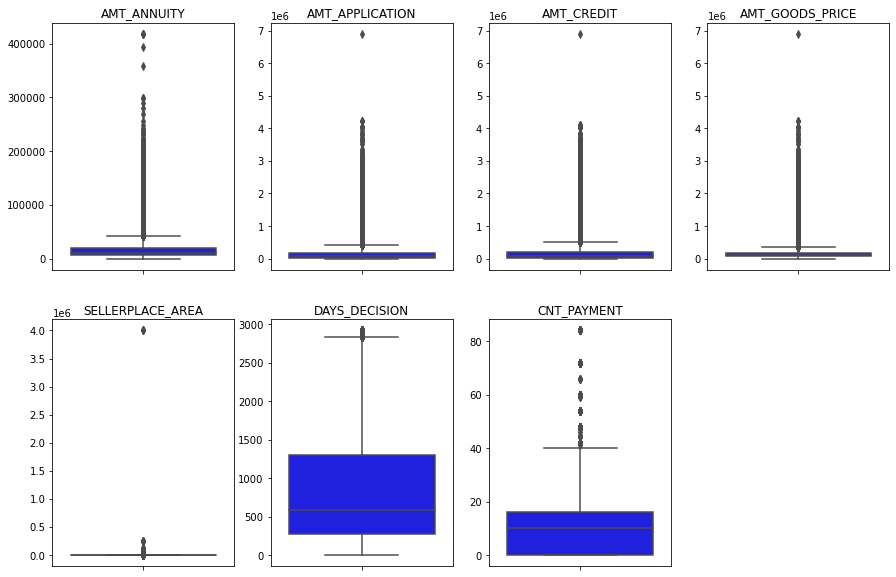

In [70]:
import itertools

previous_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[15,10])
for i,j in itertools.zip_longest(previous_outlier_col, range(len(previous_outlier_col))):
    plt.subplot(2,4,j+1)
    sns.boxplot(y = previous_application[i], color = "blue")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)  
plt.show()

#### Observation

* **AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE** have huge number of outliers
* **SELLERPLACE_AREA** has few oitliers in border and the extreme upper side.
* **DAYS_DECISION** has little number of outliers in the upper side.
* **CNT_PAYMENT** has few outlier values

## Data Analysis

## Univariate Analysis

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


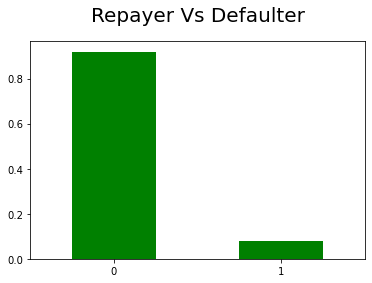

In [72]:
# Checking the imbalance percentage.

print(100*application_data.TARGET.value_counts()/ len(application_data))
(application_data.TARGET.value_counts()/ len(application_data)).plot.bar(color='green')
plt.title("Repayer Vs Defaulter", fontdict = {"fontsize":20}, pad = 20)
plt.xticks(rotation=0)
plt.show()

* In application_data there exists 91.927118% of "non-defaulter" and 8.072882% of "defaulter" customers.

* Plot showing that secondary/special educated people are applying loans in high in number.
* Secondary/special educated people are applying loans high in number and Academic degree educated people are less applying loan.


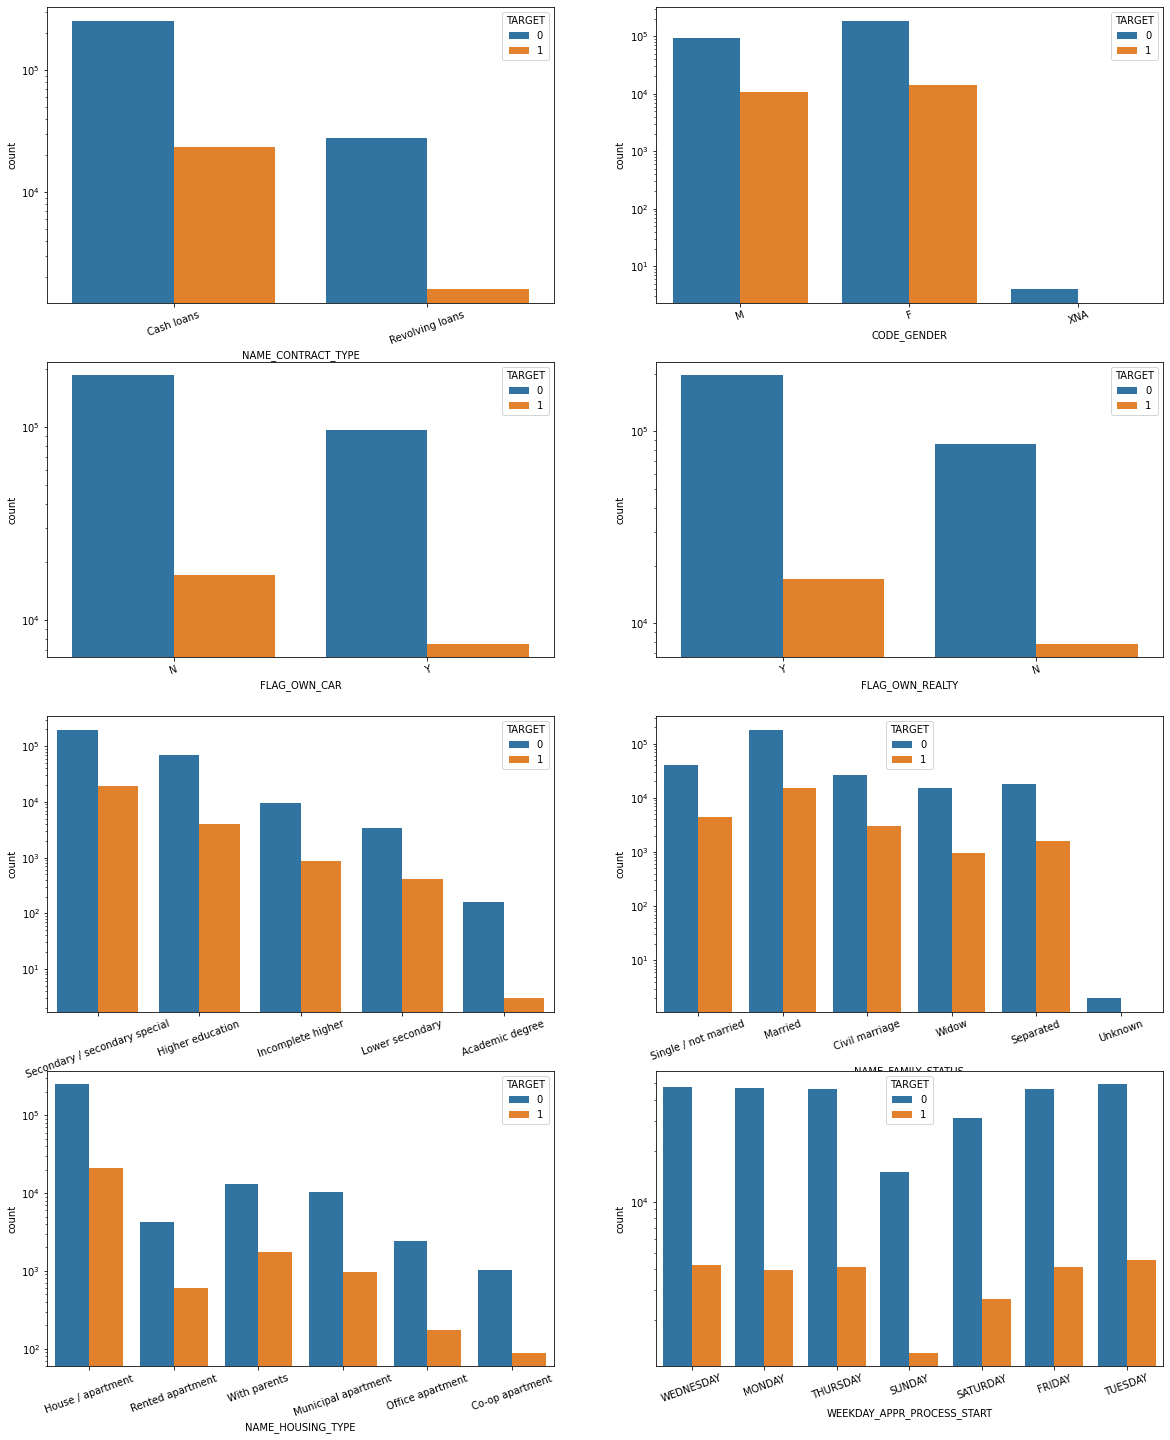

In [75]:
# checking relevent categorical columns

categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START']

plt.figure(figsize=(20,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=application_data)
    plt.yscale('log')
    plt.xticks(rotation=20)
plt.show()


* People tend to take more cash loans, and default percentage of revolving loans is less
* Female tends to take more loans
* People who don't own a car tends to take more loans
* People with real estate tends to take more loans
* we can conclude that secondary/special educated people are applying loans in high in number
* We can say more married people tend to take more Loan as compaired to other categories
* People with house or appartment tend to take more loans
* People who started application process on sunday are less likely to default
* Saturday and sunday are less busy for bank in terms of loan applications
 

## Bivariate Analysis

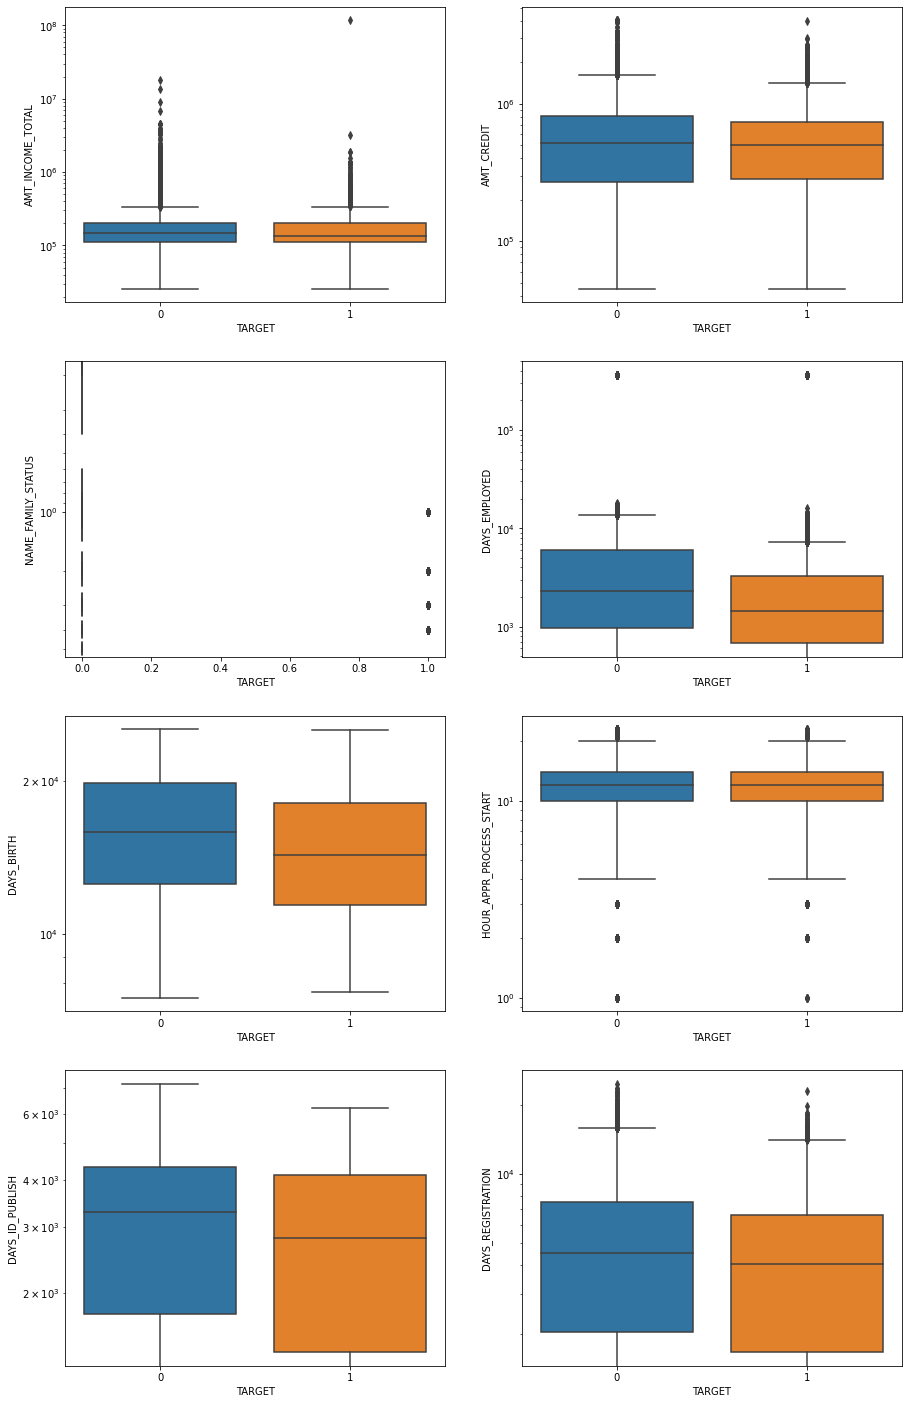

In [115]:
#Bi-variate continous plots

bivari_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','NAME_FAMILY_STATUS',
                   'DAYS_EMPLOYED','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                   'DAYS_ID_PUBLISH','DAYS_REGISTRATION']

plt.figure(figsize=(15,25))
for i in (enumerate(bivari_columns)):
    plt.subplot(len(bivari_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=application_data[i[1]].dropna(),data=application_data)
    plt.yscale('log')
plt.show() 

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27675
1                        23221             1604


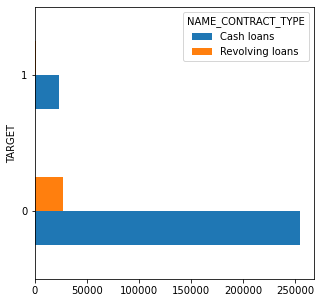

In [88]:
# Correlation between TARGET and NAME_CONTRACT_TYPE variables

Plot_1= pd.crosstab(index=application_data['TARGET'],columns=application_data['NAME_CONTRACT_TYPE'])
print(Plot_1)
Plot_1.plot(kind="barh", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

NAME_FAMILY_STATUS  Civil marriage  Married  Separated  Single / not married  \
TARGET                                                                         
0                            26814   181582      18150                 40987   
1                             2961    14850       1620                  4457   

NAME_FAMILY_STATUS  Unknown  Widow  
TARGET                              
0                         2  15151  
1                         0    937  



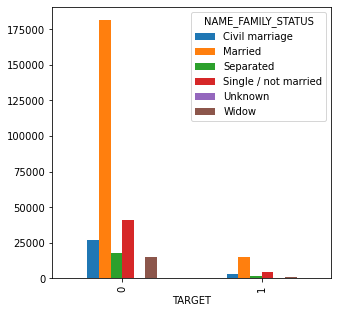

In [116]:
Plot_2= pd.crosstab(index=application_data['TARGET'],columns=application_data['NAME_FAMILY_STATUS'])
print(Plot_2)
print()
Plot_2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143550  
1                      2982           1249        0           8    15224  



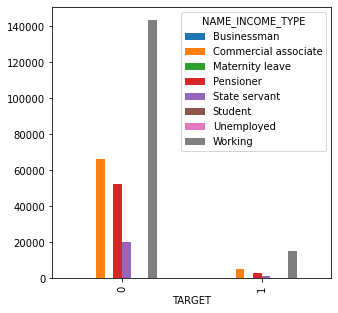

In [91]:
Plot_3= pd.crosstab(index=application_data['TARGET'],columns=application_data['NAME_INCOME_TYPE'])
print(Plot_3)
print()
Plot_3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                             1033             251596                10228   
1                               89              21272                  955   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2445              4280         13104  
1                               172               601          1736  



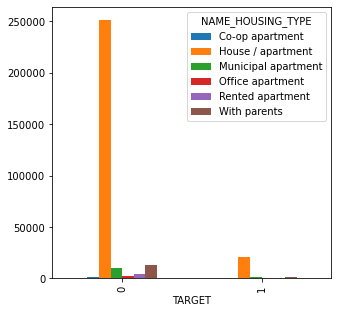

In [92]:
Plot_4= pd.crosstab(index=application_data['TARGET'],columns=application_data['NAME_HOUSING_TYPE'])
print(Plot_4)
print()
Plot_4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

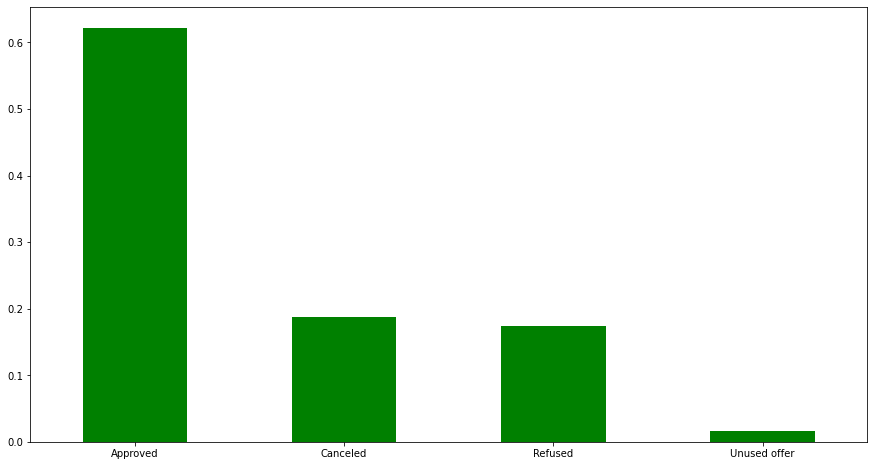

In [94]:
plt.figure(figsize=(15,8))
(previous_application.NAME_CONTRACT_STATUS.value_counts()/len(previous_application)).plot.bar(color= 'green')
plt.xticks(rotation=0)
plt.show()

## Final Conclusion

* **Majority of the previously cancelled client repayed the loan.**
* **The clients who were refused by bank for loan earlier have now turned into a repaying client and these clients could be contacted for further loans.**

## Top 10 major variables for predicting the loan risk :

1. **NAME_EDUCATION_TYPE - higher degree has less chances of defaults.**
2. **AMT_INCOME_TOTAL - higher the income less chances to defaults.**
3. **DAYS_BIRTH - people with high age group less chances to defaults.**
4. **AMT_CREDIT - people with moderate credit amount has less chances to defaults**.
5. **DAYS_EMPLOYED - higher the working experience less chances to defaults**.
6. **AMT_ANNUITY - modrate loan has comparitively less chances of defaults**
7. **NAME_INCOME_TYPE - Student and Businessmen have no default.**
8. **CODE_GENDER - Females applies for loan in high percentage**.
9. **NAME_HOUSING_TYPE - home/ apartments has less defaults.**
10. **NAME_FAMILY_STATUS - married people are less defaulters.**